In [2]:
import fcntl
# import uproot
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import concurrent.futures, multiprocessing
ncpu = multiprocessing.cpu_count()
executor = concurrent.futures.ThreadPoolExecutor(ncpu*4)

%matplotlib inline

import timeit
start_time = timeit.default_timer()

# Get data

In [3]:
import uproot

Select file name and open through `uproot`

In [4]:
#fname = "/Users/artur/cernbox/HGCAL/cluster/ntuples/hgcalNtuple_qcd_cyl_rad3_n100.root"
#fname = "/Users/artur/cernbox/HGCAL/cluster/ntuples/hgcalNtuple_gamma25_newDefault_n9000.root"
#fname = "/Users/artur/cernbox/HGCAL/cluster/ntuples/hgcalNtuple_ele15_n100_testhelper.root"
#fname = "/Users/artur/cernbox/HGCAL/cluster/ntuples/hgcalNtuple_gamma25_cyl_rad3_n100_PU.root"
#fname = "/Users/artur/cernbox/HGCAL/cluster/ntuples/hgcalNtuple_pi25_n100.root"
#fname = "/Users/artur/cernbox/HGCAL/cluster/ntuples/fromZiheng/CMSSW9304_partGun_PDGid22_x1000_E300.0To300.0_NTUP.root"
fname = "../InputData/hgcalNtuple_electrons_15GeV_n100.root"

tree = uproot.open(fname)["ana/hgc"]

Define variables (branches) to read from the file

In [5]:
branches = []

branches += ["genpart_gen","genpart_reachedEE","genpart_energy","genpart_eta","genpart_phi", "genpart_pid","genpart_posx","genpart_posy","genpart_posz"]

branches += ["rechit_x", "rechit_y", "rechit_z", "rechit_energy","rechit_layer", 'rechit_flags','rechit_cluster2d',
            'cluster2d_multicluster']

In [6]:
# Read and cache data
cache = {}
df = tree.pandas.df(branches, cache = cache,executor=executor)

In [7]:
#%timeit tree.pandas.df(branches, cache = cache,executor=executor)

Look at the first 5 events

In [8]:
df[:2]

,b'genpart_gen',b'genpart_reachedEE',b'genpart_energy',b'genpart_eta',b'genpart_phi',b'genpart_pid',b'genpart_posx',b'genpart_posy',b'genpart_posz',b'rechit_x',b'rechit_y',b'rechit_z',b'rechit_energy',b'rechit_layer',b'rechit_flags',b'rechit_cluster2d',b'cluster2d_multicluster'
0,"[1, 2, -1, -1, -1, -1, -1, -1, -1]","[2, 2, 2, 2, 2, 2, 2, 2, 2]","[45.1184, 45.1184, 39.4531, 3.30556, 1.04493, ...","[1.76612, -1.76612, -1.7664, -1.76556, 1.76688...","[1.69589, -1.4457, -1.45838, -1.62447, 1.70974...","[11, -11, 22, 22, 22, 22, 22, 22, 22]","[[-18.8752, -18.93, -19.0197, -19.0745, -19.16...","[[111.631, 111.889, 112.313, 112.571, 112.995,...","[[320.755, 321.505, 322.735, 323.485, 324.715,...","[10.6832, 12.6199, 11.2455, 12.6199, 12.6199, ...","[-115.892, -118.814, -116.866, -120.762, -116....","[-330.735, -330.735, -330.735, -330.735, -330....","[0.0127074, 0.0150606, 0.0312978, 0.00611838, ...","[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[1, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,...","[2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, ...","[100.345, 100.345, 10.3193, 2.23278, 28.3023, ...","[2.58842, -2.58842, -2.58815, -2.58766, -2.587...","[1.49584, -1.64575, -1.65878, -1.66284, -1.664...","[11, -11, 22, 22, 22, 22, 22, 22, 22, 22, 22, ...","[[2.73072, 2.73523, 2.7426, 2.74709, 2.75443, ...","[[47.8181, 47.9313, 48.1171, 48.2303, 48.4161,...","[[320.755, 321.505, 322.735, 323.485, 324.715,...","[-7.422, -6.59733, -7.00967, -8.24667, -7.0096...","[-50.945, -50.945, -50.2308, -49.5166, -48.802...","[-330.735, -330.735, -330.735, -330.735, -330....","[0.0286782, 0.0202846, 0.020984, 0.0300771, 0....","[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# Look at an event

In [9]:
event_id = 12

### Create particles data frame

In [10]:
new_name = []
for a in df.columns:
#     if b'genpart_' in a:
#         new_name.append(a[8:].decode('ascii'))
#     else:
    new_name.append(a.decode('ascii'))

print (new_name)

['genpart_gen', 'genpart_reachedEE', 'genpart_energy', 'genpart_eta', 'genpart_phi', 'genpart_pid', 'genpart_posx', 'genpart_posy', 'genpart_posz', 'rechit_x', 'rechit_y', 'rechit_z', 'rechit_energy', 'rechit_layer', 'rechit_flags', 'rechit_cluster2d', 'cluster2d_multicluster']


In [11]:
df.columns = new_name
# all_particles = pd.DataFrame(df.loc[12])


In [13]:
all_particles = pd.DataFrame({name.replace('genpart_',''):df.loc[event_id,name] for name in branches if 'genpart_' in name })

In [14]:
# add pt column
all_particles['pt'] = all_particles.energy/np.cosh(all_particles.eta)

In [15]:
all_particles[:5]

,energy,eta,gen,phi,pid,posx,posy,posz,reachedEE,pt
0,57.150143,2.012478,1,-3.093405,11,"[-87.604, -87.8069, -88.1395, -88.3423, -88.67...","[-7.11594, -7.1389, -7.1766, -7.19964, -7.2374...","[320.755, 321.505, 322.735, 323.485, 324.715, ...",2,15.008920
1,57.150143,-2.012478,2,0.048188,-11,"[86.6693, 86.8734, 87.2081, 87.4122, 87.7469, ...","[1.37011, 1.36696, 1.36172, 1.35849, 1.35307, ...","[-320.755, -321.505, -322.735, -323.485, -324....",2,15.008920
2,1.062125,-2.012514,-1,0.045849,22,[],[],[],0,0.278928
3,45.389442,2.013108,-1,-3.091439,22,"[-87.7428, -87.9465, -88.2806, -88.4844, -88.8...","[-4.40191, -4.41213, -4.42891, -4.43913, -4.45...","[320.755, 321.505, 322.735, 323.485, 324.715, ...",2,11.913045
4,8.608773,2.015048,-1,-3.047242,22,"[-87.345, -87.5477, -87.8801, -88.0828, -88.41...","[-7.85375, -7.87293, -7.90438, -7.92356, -7.95...","[320.755, 321.505, 322.735, 323.485, 324.715, ...",2,2.255258


In [16]:
all_particles

,energy,eta,gen,phi,pid,posx,posy,posz,reachedEE,pt
0,57.150143,2.012478,1,-3.093405,11,"[-87.604, -87.8069, -88.1395, -88.3423, -88.67...","[-7.11594, -7.1389, -7.1766, -7.19964, -7.2374...","[320.755, 321.505, 322.735, 323.485, 324.715, ...",2,15.008920
1,57.150143,-2.012478,2,0.048188,-11,"[86.6693, 86.8734, 87.2081, 87.4122, 87.7469, ...","[1.37011, 1.36696, 1.36172, 1.35849, 1.35307, ...","[-320.755, -321.505, -322.735, -323.485, -324....",2,15.008920
2,1.062125,-2.012514,-1,0.045849,22,[],[],[],0,0.278928
3,45.389442,2.013108,-1,-3.091439,22,"[-87.7428, -87.9465, -88.2806, -88.4844, -88.8...","[-4.40191, -4.41213, -4.42891, -4.43913, -4.45...","[320.755, 321.505, 322.735, 323.485, 324.715, ...",2,11.913045
4,8.608773,2.015048,-1,-3.047242,22,"[-87.345, -87.5477, -87.8801, -88.0828, -88.41...","[-7.85375, -7.87293, -7.90438, -7.92356, -7.95...","[320.755, 321.505, 322.735, 323.485, 324.715, ...",2,2.255258
5,0.808380,2.011410,-1,-2.857453,22,"[-85.2863, -85.4825, -85.8042, -86.0003, -86.3...","[-20.2586, -20.3159, -20.4099, -20.4672, -20.5...","[320.755, 321.505, 322.735, 323.485, 324.715, ...",2,0.212518
6,1.021019,-2.004915,-1,0.049649,-11,"[76.1607, 76.1933, 76.2436, 76.2728, 76.3154, ...","[-18.3705, -18.566, -18.8866, -19.0815, -19.40...","[-320.755, -321.505, -322.735, -323.485, -324....",2,0.270106
7,7.222666,-2.012548,-1,0.044382,22,[],[],[],0,1.896706
8,1.380343,-2.012975,-1,0.028272,22,"[86.6174, 86.8213, 87.1558, 87.3598, 87.6942, ...","[2.68364, 2.68941, 2.69886, 2.70463, 2.71409, ...","[-320.755, -321.505, -322.735, -323.485, -324....",2,0.362336
9,0.416993,-2.013011,-1,0.019819,22,"[86.6259, 86.8299, 87.1644, 87.3684, 87.7029, ...","[2.1859, 2.18994, 2.19657, 2.20061, 2.20725, 2...","[-320.755, -321.505, -322.735, -323.485, -324....",2,0.109455


Select particles (the ones with gen > 0 are the initial particles)

In [17]:
selected_part_ind = (all_particles.gen > -2)
selected_part_ind &= (all_particles.reachedEE > 1) 
selected_part_ind &= (all_particles.pt > 5) 
selected_part_ind &= (all_particles.eta > 0) 


particles = all_particles[selected_part_ind]

In [18]:
particles

,energy,eta,gen,phi,pid,posx,posy,posz,reachedEE,pt
0,57.150143,2.012478,1,-3.093405,11,"[-87.604, -87.8069, -88.1395, -88.3423, -88.67...","[-7.11594, -7.1389, -7.1766, -7.19964, -7.2374...","[320.755, 321.505, 322.735, 323.485, 324.715, ...",2,15.008920
3,45.389442,2.013108,-1,-3.091439,22,"[-87.7428, -87.9465, -88.2806, -88.4844, -88.8...","[-4.40191, -4.41213, -4.42891, -4.43913, -4.45...","[320.755, 321.505, 322.735, 323.485, 324.715, ...",2,11.913045


In [19]:
# print Pt
particles.energy/np.cosh(particles.eta)

0    15.008920
3    11.913045
dtype: float32

In [20]:
min_lay = 0
max_lay = 55

 ---- 
[ -87.60403442  -87.80686188  -88.13949585  -88.3423233   -88.67494965
  -88.87776184  -89.21035767  -89.41316223  -89.74575806  -89.94855499
  -90.30276489  -90.53798676  -90.8921814   -91.12740326  -91.48157501
  -91.71678925  -92.07094574  -92.30614471  -92.66028595  -92.89547729
  -93.2874527   -93.57668304  -93.96862793  -94.25785828  -94.64978027
  -94.93898773  -95.3309021   -95.6200943   -97.22268677  -98.48731995
  -99.75182343 -101.01618958 -102.28044128 -103.54454803 -104.80851746
 -106.07237244 -107.33609772 -108.59967804 -109.86312866 -111.12644958] [-7.11593819 -7.13890219 -7.17660379 -7.19964266 -7.23749495 -7.26060581
 -7.2985673  -7.32175159 -7.35985231 -7.38311243 -7.42378426 -7.45087147
 -7.49170494 -7.518857   -7.55984402 -7.58709145 -7.62821341 -7.6555624
 -7.69681549 -7.72426891 -7.77008533 -7.80396128 -7.84996128 -7.88395977
 -7.93013    -7.96426535 -8.01061344 -8.04488754 -8.23577785 -8.38763905
 -8.54054928 -8.69448948 -8.84944916 -9.0056076  -9.16265678

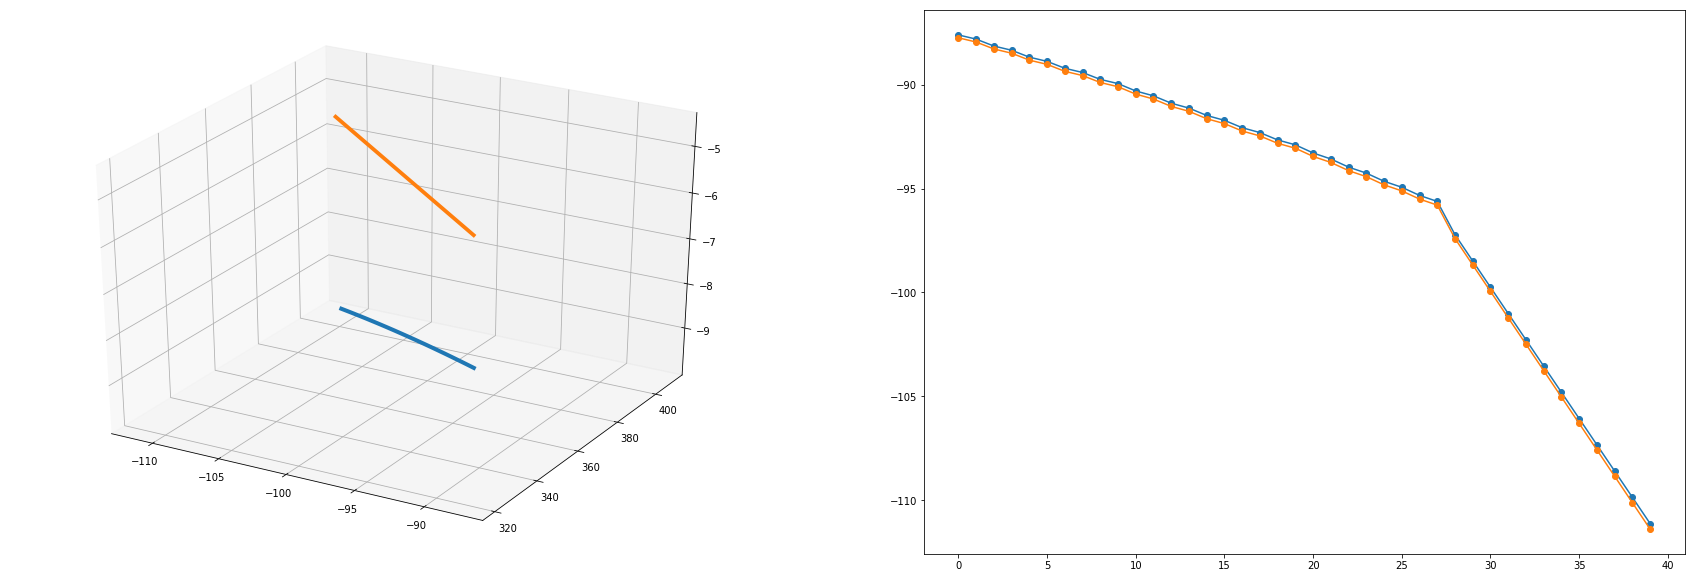

In [22]:
fig = plt.figure(figsize=(30, 10))
ax1 = plt.subplot(121, projection = '3d')
ax2 = plt.subplot(122)

for i_part in particles.index:
    
    posx = particles.loc[i_part,'posx'][min_lay:max_lay]
    posy = particles.loc[i_part,'posy'][min_lay:max_lay]
    posz = particles.loc[i_part,'posz'][min_lay:max_lay]
    ene = particles.loc[i_part,'energy']
    print (' ---- ')
    print (posx, posy, posz, ene)
    ax1.plot(posx,posz,posy, '-', linewidth = np.log(ene))
    #ax1.scatter(posx,posz,posy,s = enes*10)

    #plt.plot(posz,'o')
    ax2.plot(posx,'-o')

### Create hits data frame

In [31]:
all_hits = pd.DataFrame({name.replace('rechit_',''):df.loc[event_id,name] for name in branches if 'rechit_' in name })

Add multicluster index

In [32]:
cl2d_ind = df.rechit_cluster2d.loc[event_id]

In [33]:
mcl_ind = df.loc[event_id,'cluster2d_multicluster'][cl2d_ind]

Adding 3d cluster index to hits df

In [34]:
all_hits['cluster3d'] = pd.Series(mcl_ind, index=all_hits.index) 

sort columns

In [36]:
# all_hits = all_hits.reindex(sorted(all_hits.columns), axis=1) not working

In [37]:
all_hits[:5]

,cluster2d,energy,flags,layer,x,y,z,cluster3d
0,0,0.007053,2,15,-92.775002,-14.608273,335.095001,0
1,0,0.027156,0,15,-93.337280,-5.843304,335.095001,0
2,0,0.022571,0,15,-92.212730,-7.791073,335.095001,0
3,0,0.184799,0,15,-92.212730,-5.843304,335.095001,0
4,0,0.063481,0,15,-93.899551,-4.869427,335.095001,0


Select hits

In [38]:
selected_hit_ind = (all_hits.flags < 3)
selected_hit_ind &= (all_hits.layer < 59) 
selected_hit_ind &= (all_hits.z > 0) 
selected_hit_ind &= (all_hits.cluster3d < 10000)
selected_hit_ind &= (all_hits.energy > -0.01)

hits = all_hits[selected_hit_ind]

## Plot

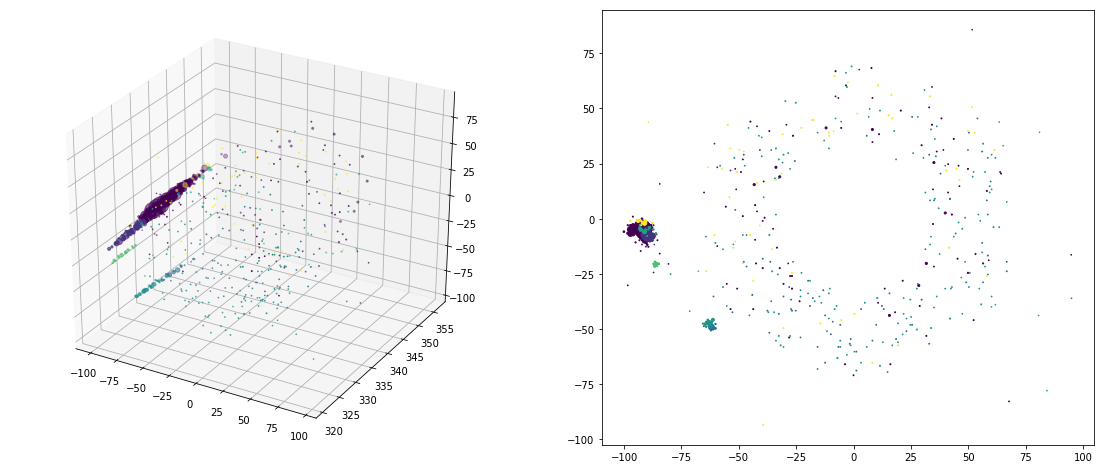

In [39]:
fig = plt.figure(figsize=(30, 8))
ax1 = plt.subplot(131, projection = '3d')
ax2 = plt.subplot(132)
#ax3 = plt.subplot(133)

ax1.scatter(hits.x,abs(hits.z),hits.y, s = hits.energy*100, c = hits.cluster3d)
ax2.scatter(hits.x,hits.y, s = hits.energy*100, c = hits.cluster3d)
#ax2.scatter(abs(hits.z),hits.y, s = hits.energy*100, c = hits.cluster3d)
#ax3.scatter(abs(hits.z),hits.x, s = hits.energy*100, c = hits.cluster3d)

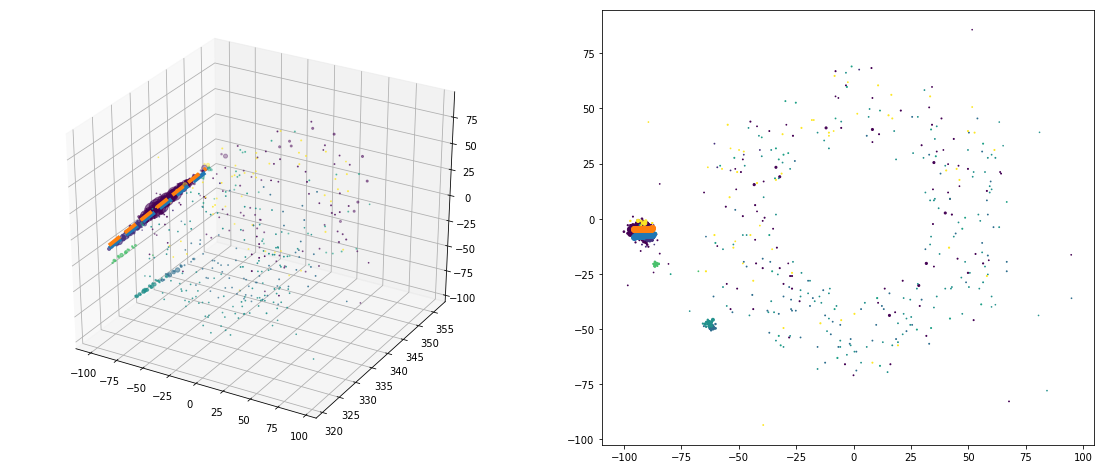

In [24]:
fig = plt.figure(figsize=(30, 8))
ax1 = plt.subplot(131, projection = '3d')
ax2 = plt.subplot(132)
#ax3 = plt.subplot(133)

ax1.scatter(hits.x,abs(hits.z),hits.y, s = hits.energy*100, c = hits.cluster3d)
ax2.scatter(hits.x,hits.y, s = hits.energy*100, c = hits.cluster3d)

max_lay = 28
for i_part in particles.index:
    
    posx = particles.loc[i_part,'posx'][min_lay:max_lay]
    posy = particles.loc[i_part,'posy'][min_lay:max_lay]
    posz = particles.loc[i_part,'posz'][min_lay:max_lay]
    ene = particles.loc[i_part,'energy']

    ax1.plot(posx,posz,posy, '--', linewidth = np.log(ene))
    #ax1.scatter(posx,posz,posy,s = enes*10)

    #plt.plot(posz,'o')
    ax2.plot(posx,posy,'o')

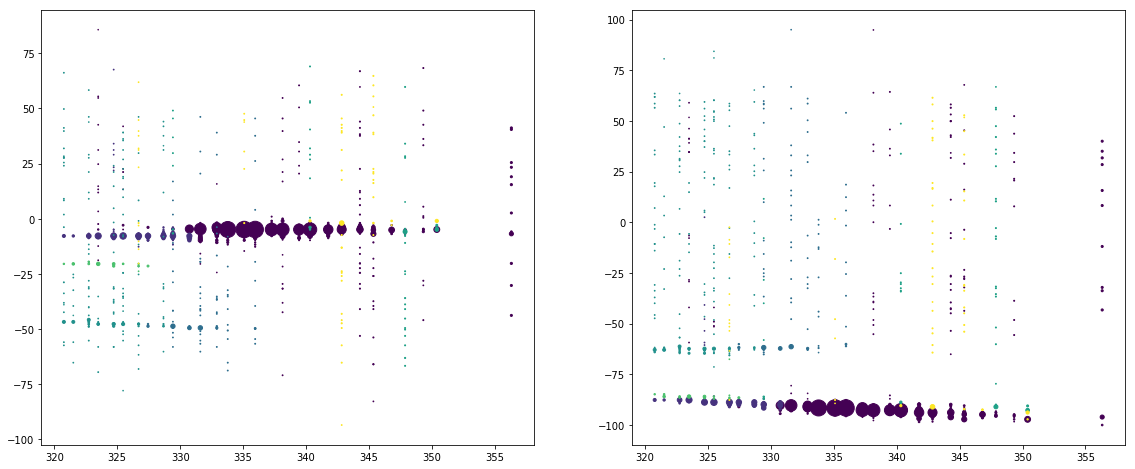

In [40]:
fig = plt.figure(figsize=(30, 8))
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax2.scatter(abs(hits.z),hits.y, s = hits.energy*100, c = hits.cluster3d)
ax3.scatter(abs(hits.z),hits.x, s = hits.energy*100, c = hits.cluster3d)
#ax3.scatter(abs(hits.z),hits.x, s = np.log10(hits.energy*1e5), c = hits.cluster3d)

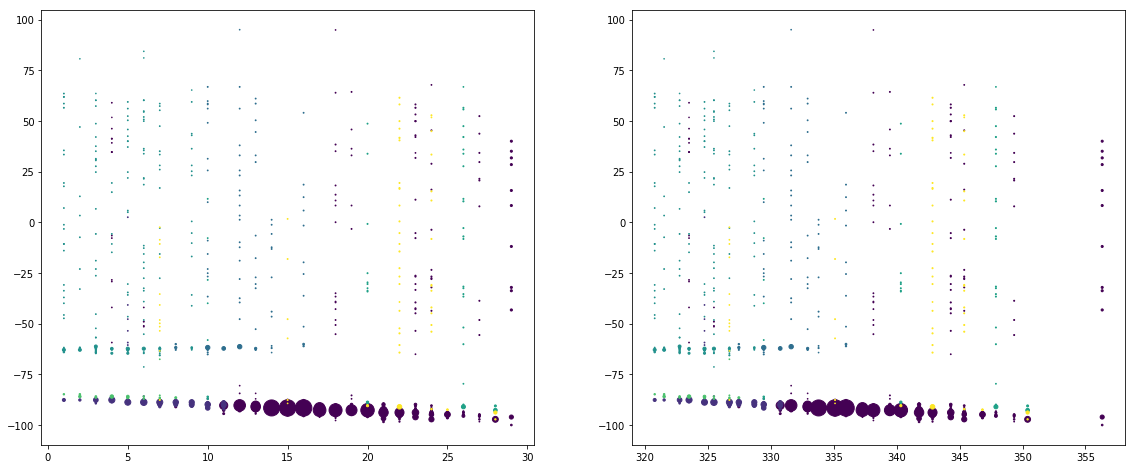

In [41]:
fig = plt.figure(figsize=(30, 8))
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax2.scatter(abs(hits.layer),hits.x, s = hits.energy*100, c = hits.cluster3d)
ax3.scatter(abs(hits.z),hits.x, s = hits.energy*100, c = hits.cluster3d)

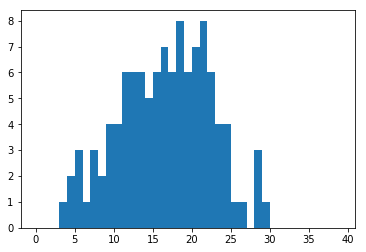

In [42]:
h = plt.hist(hits.layer[hits.energy > 0.1], bins = np.arange(40))

In [28]:
#import seaborn as sns
#sns.set()
#sns.set_style("white")
#h = plt.hist(hits.layer[hits.energy > 0.1], bins = np.arange(40))

In [29]:
print("--- %s seconds ---" % (timeit.default_timer() - start_time))

--- 5.70590400696 seconds ---
